# QUESTION
1. What about branch and city transactions?
2. Which city has the highest income?
3. How does each product contribute?
4. What about customer type transactions
5. What about by Gender?
6. What method is most commonly used?
7. How is the Growth based on income?
8. How is Growth By Date?
9. Analysis of the highest sales by date
10. How is the growth from Day 1 to End?

In [1635]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [1636]:
df = pd.read_csv('supermarket_sales - Sheet1.csv',header=0)
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [1637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [1638]:
df.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


In [1639]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [1640]:
df.shape

(1000, 17)

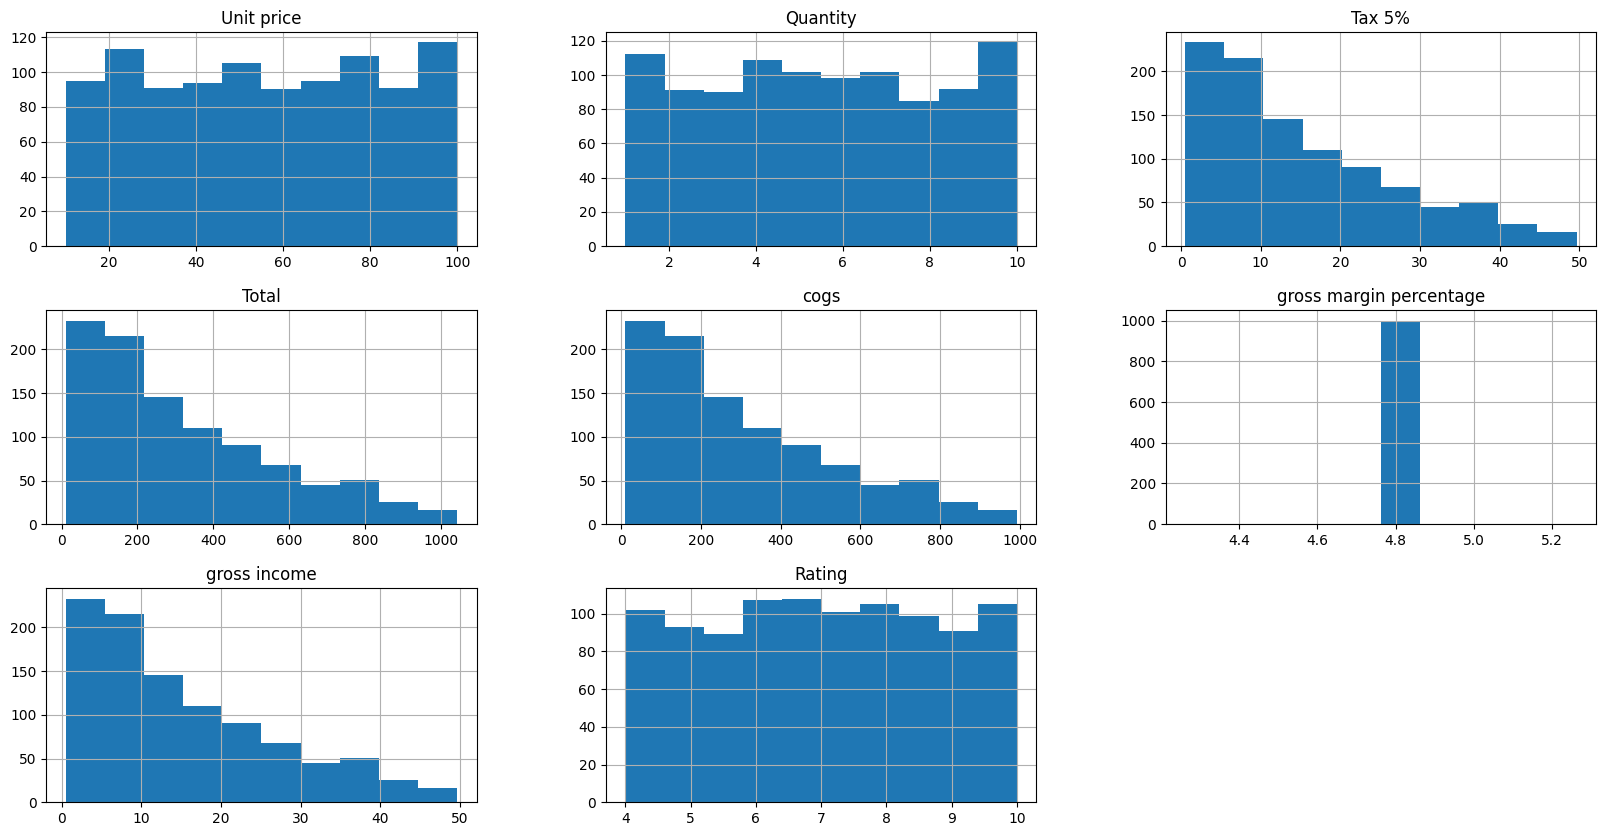

In [1641]:
df.hist(figsize=(20,10))
plt.show()

In [1642]:
kolom = ['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating']
df[kolom]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


<Axes: >

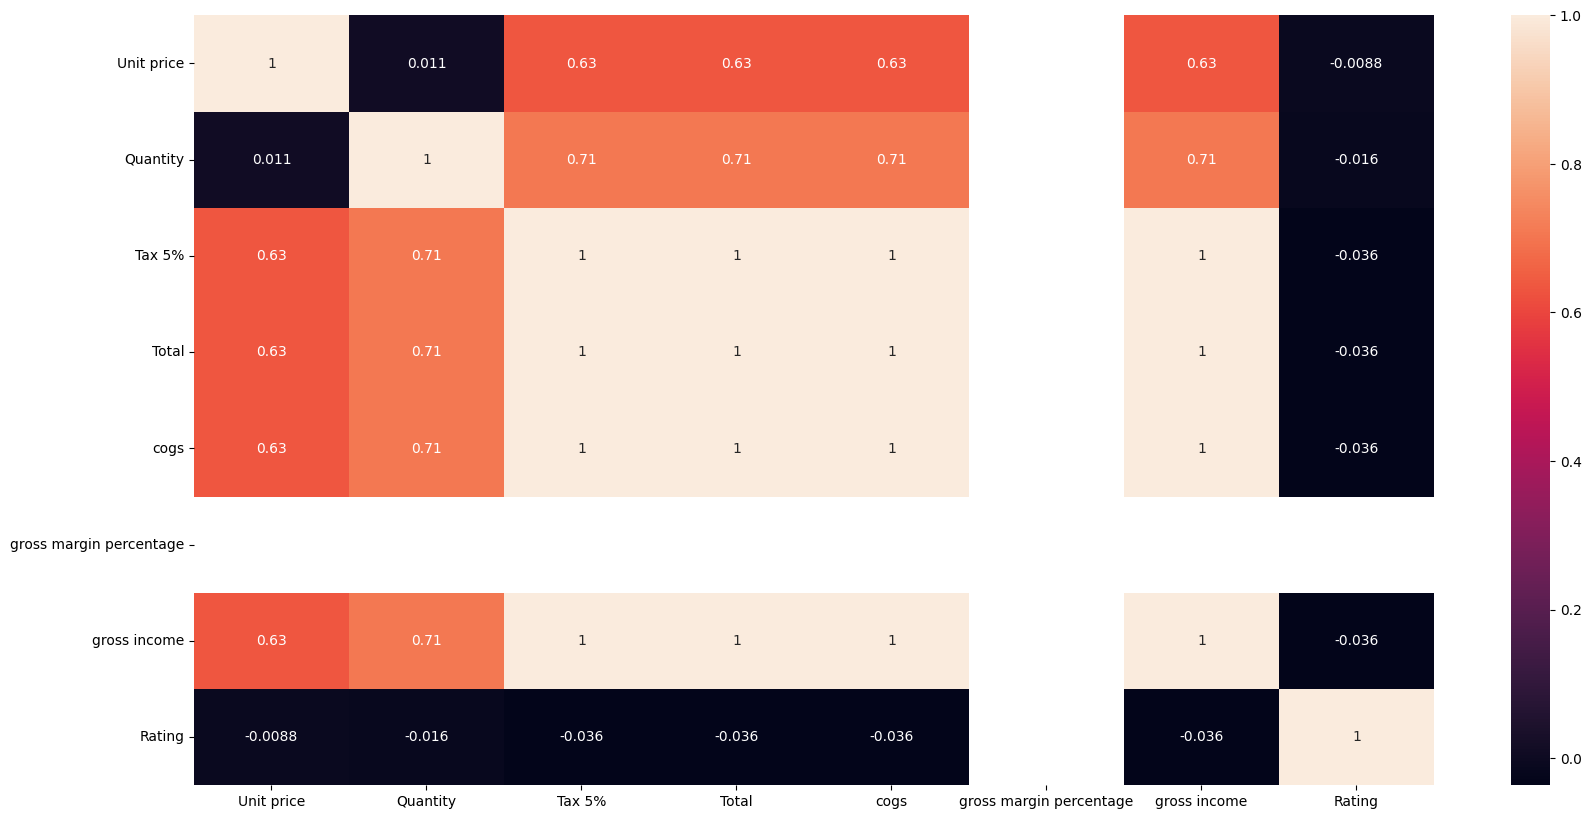

In [1643]:
plt.figure(figsize=(20,10))
sns.heatmap(df[kolom].corr(), annot= True)

# BRANCH

  Branch  count
0      A    340
1      B    332
2      C    328


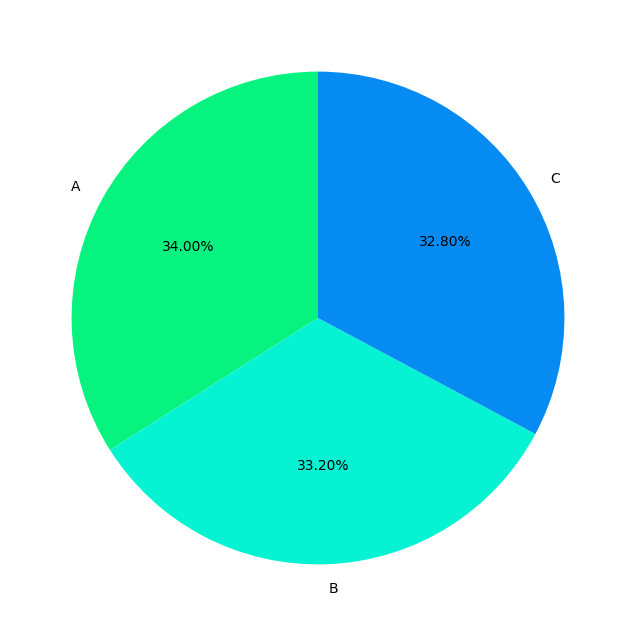

In [1644]:
branch_count = df['Branch'].value_counts().reset_index()
plt.figure(figsize=(10,8))
plt.pie(branch_count['count'],labels=branch_count['Branch'],
       startangle=90,autopct='%1.2f%%',
       colors=['#06F380','#06F3D3','#068BF3'])
print(branch_count)

In [1645]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [1646]:
city_branch= df.groupby(['Branch','City'],as_index=False).agg({
    'Total' : 'sum',
    'Quantity' : 'sum'
})
city_branch

,Branch,City,Total,Quantity
0,A,Yangon,106200.3705,1859
1,B,Mandalay,106197.6720,1820
2,C,Naypyitaw,110568.7065,1831


<Axes: xlabel='City', ylabel='Total'>

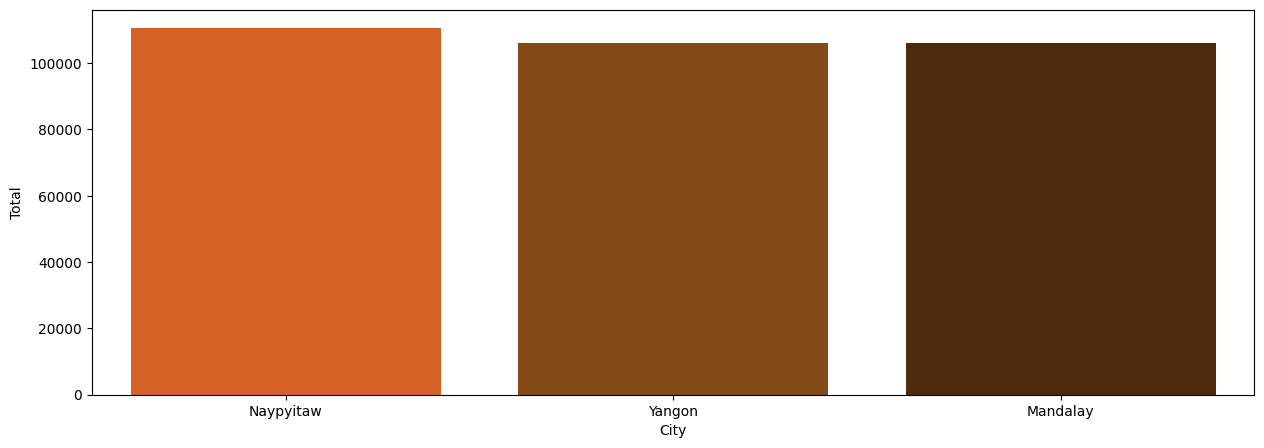

In [1719]:
colors = ['#F35906','#954906','#582A02']
plt.figure(figsize=(15,5))
sns.barplot(x='City',y='Total',data=city_branch.sort_values(by='Total',ascending=False),palette=colors)

### A = Yangon
### B = Mandalay
### C = Naypyitaw

## TOP BRANCH BASED ON REVENUE

In [1647]:
df.groupby('City').agg({
    'Total' : 'sum',
    'Quantity' : 'sum'
}).sort_values(by='Total',ascending=False)

,Total,Quantity
City,,
Naypyitaw,110568.7065,1831
Yangon,106200.3705,1859
Mandalay,106197.6720,1820


## BASED ON PRODUCT LINE

In [1648]:
product = df.groupby('Product line',as_index=False).agg({
    'Total' : 'sum',
    'Invoice ID' : 'nunique',
    'Quantity' : 'sum',
    'gross income' : 'sum',
    'cogs' : 'sum'
})
product.rename(columns={
    'Invoice ID' : 'count'
},inplace=True)

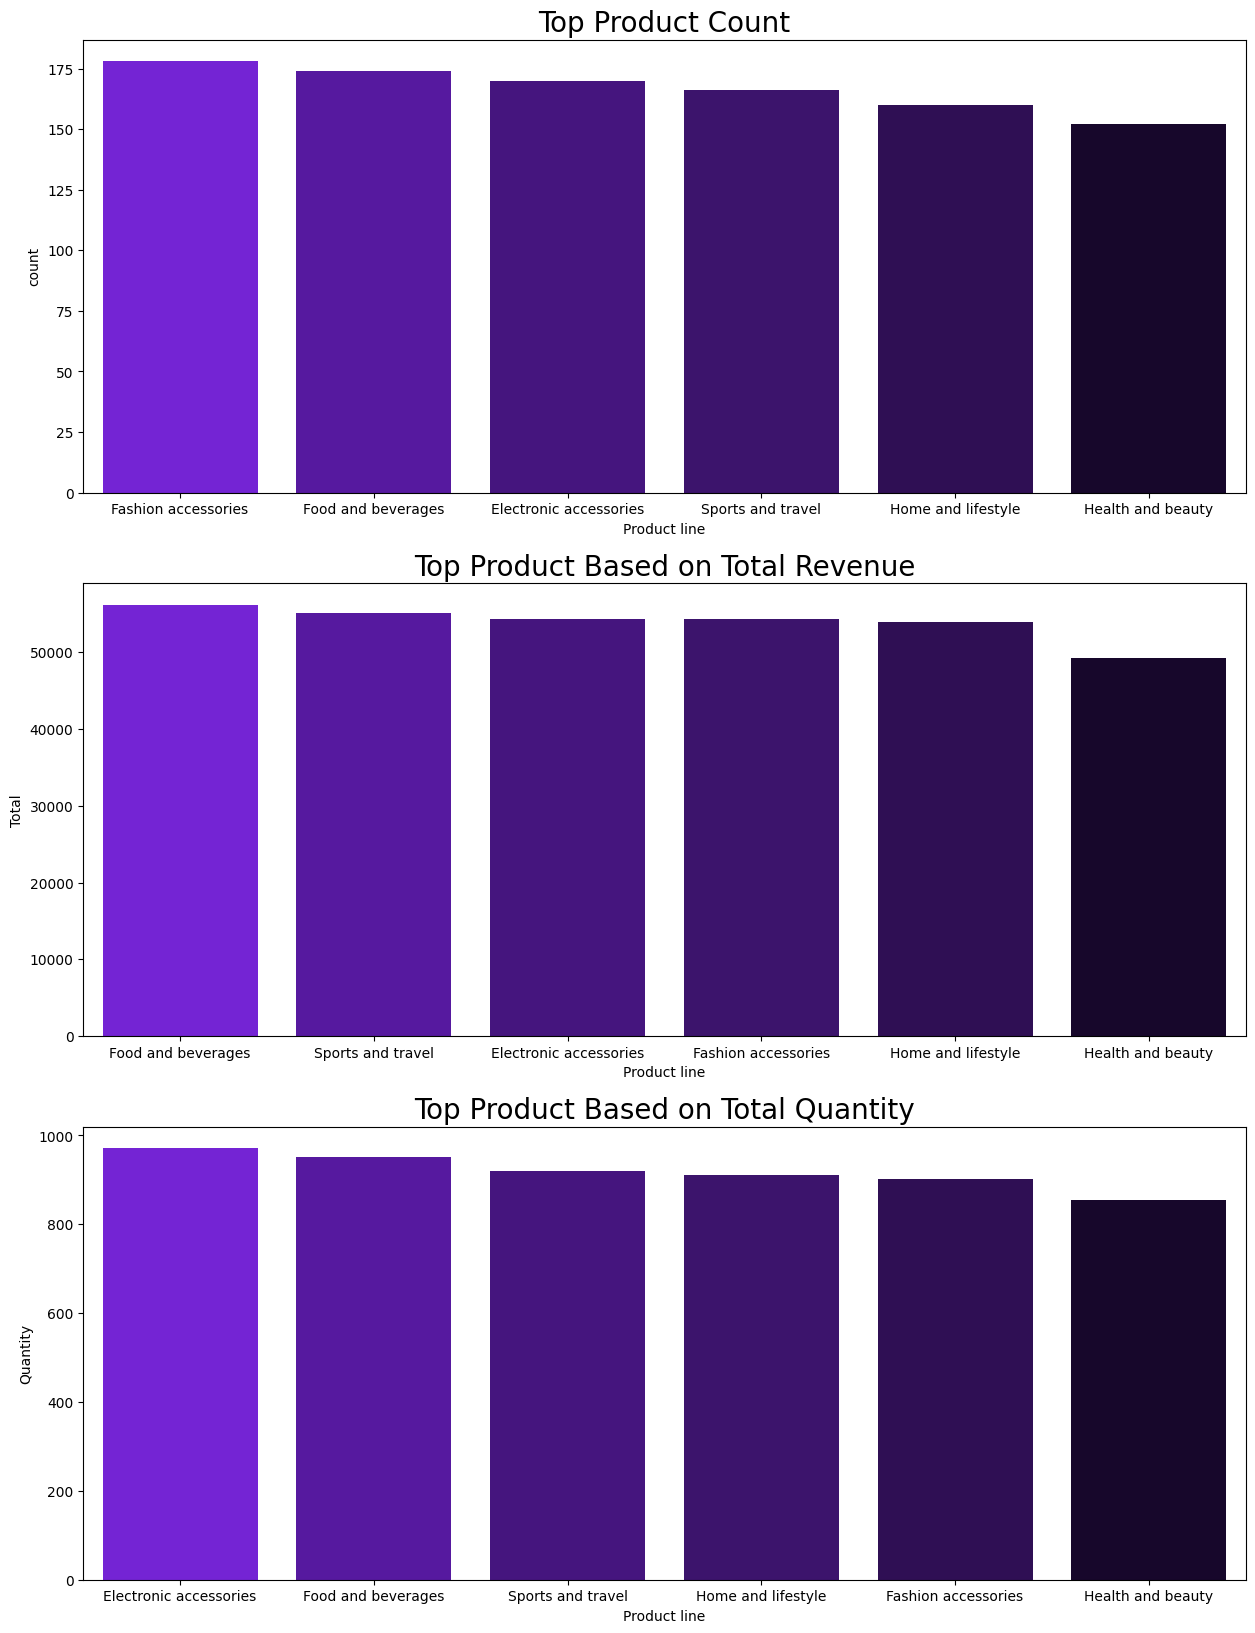

In [1649]:
colors=['#7106F2','#5403B5','#43048F','#3B057B','#2E045F','#170131']
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15,20))
sns.barplot(x='Product line',y='count',data=product.sort_values(by='count',ascending=False),palette=colors,ax=ax[0])
ax[0].set_title('Top Product Count',fontsize=20)
sns.barplot(x='Product line',y='Total',data=product.sort_values(by='Total',ascending=False),palette=colors,ax=ax[1])
ax[1].set_title('Top Product Based on Total Revenue',fontsize=20)
sns.barplot(x='Product line',y='Quantity',data=product.sort_values(by='Quantity',ascending=False),palette=colors,ax=ax[2])
ax[2].set_title('Top Product Based on Total Quantity',fontsize=20)
plt.show()

In [1650]:
product_branch= df.groupby(['City','Product line'],as_index=False).agg({
    'Total' : 'sum',
    'Quantity' : 'sum'
})

## Total Branch Based On Total Product line

In [1651]:
pd.pivot_table(product_branch,
              index='City',
              columns='Product line',
              values= 'Total',
              aggfunc='sum')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


## Total Branch Based On Quantity Product line

In [1652]:
pd.pivot_table(product_branch,
              index='City',
              columns='Product line',
              values='Quantity',
              aggfunc='sum')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,316,297,270,320,295,322
Naypyitaw,333,342,369,277,245,265
Yangon,322,263,313,257,371,333


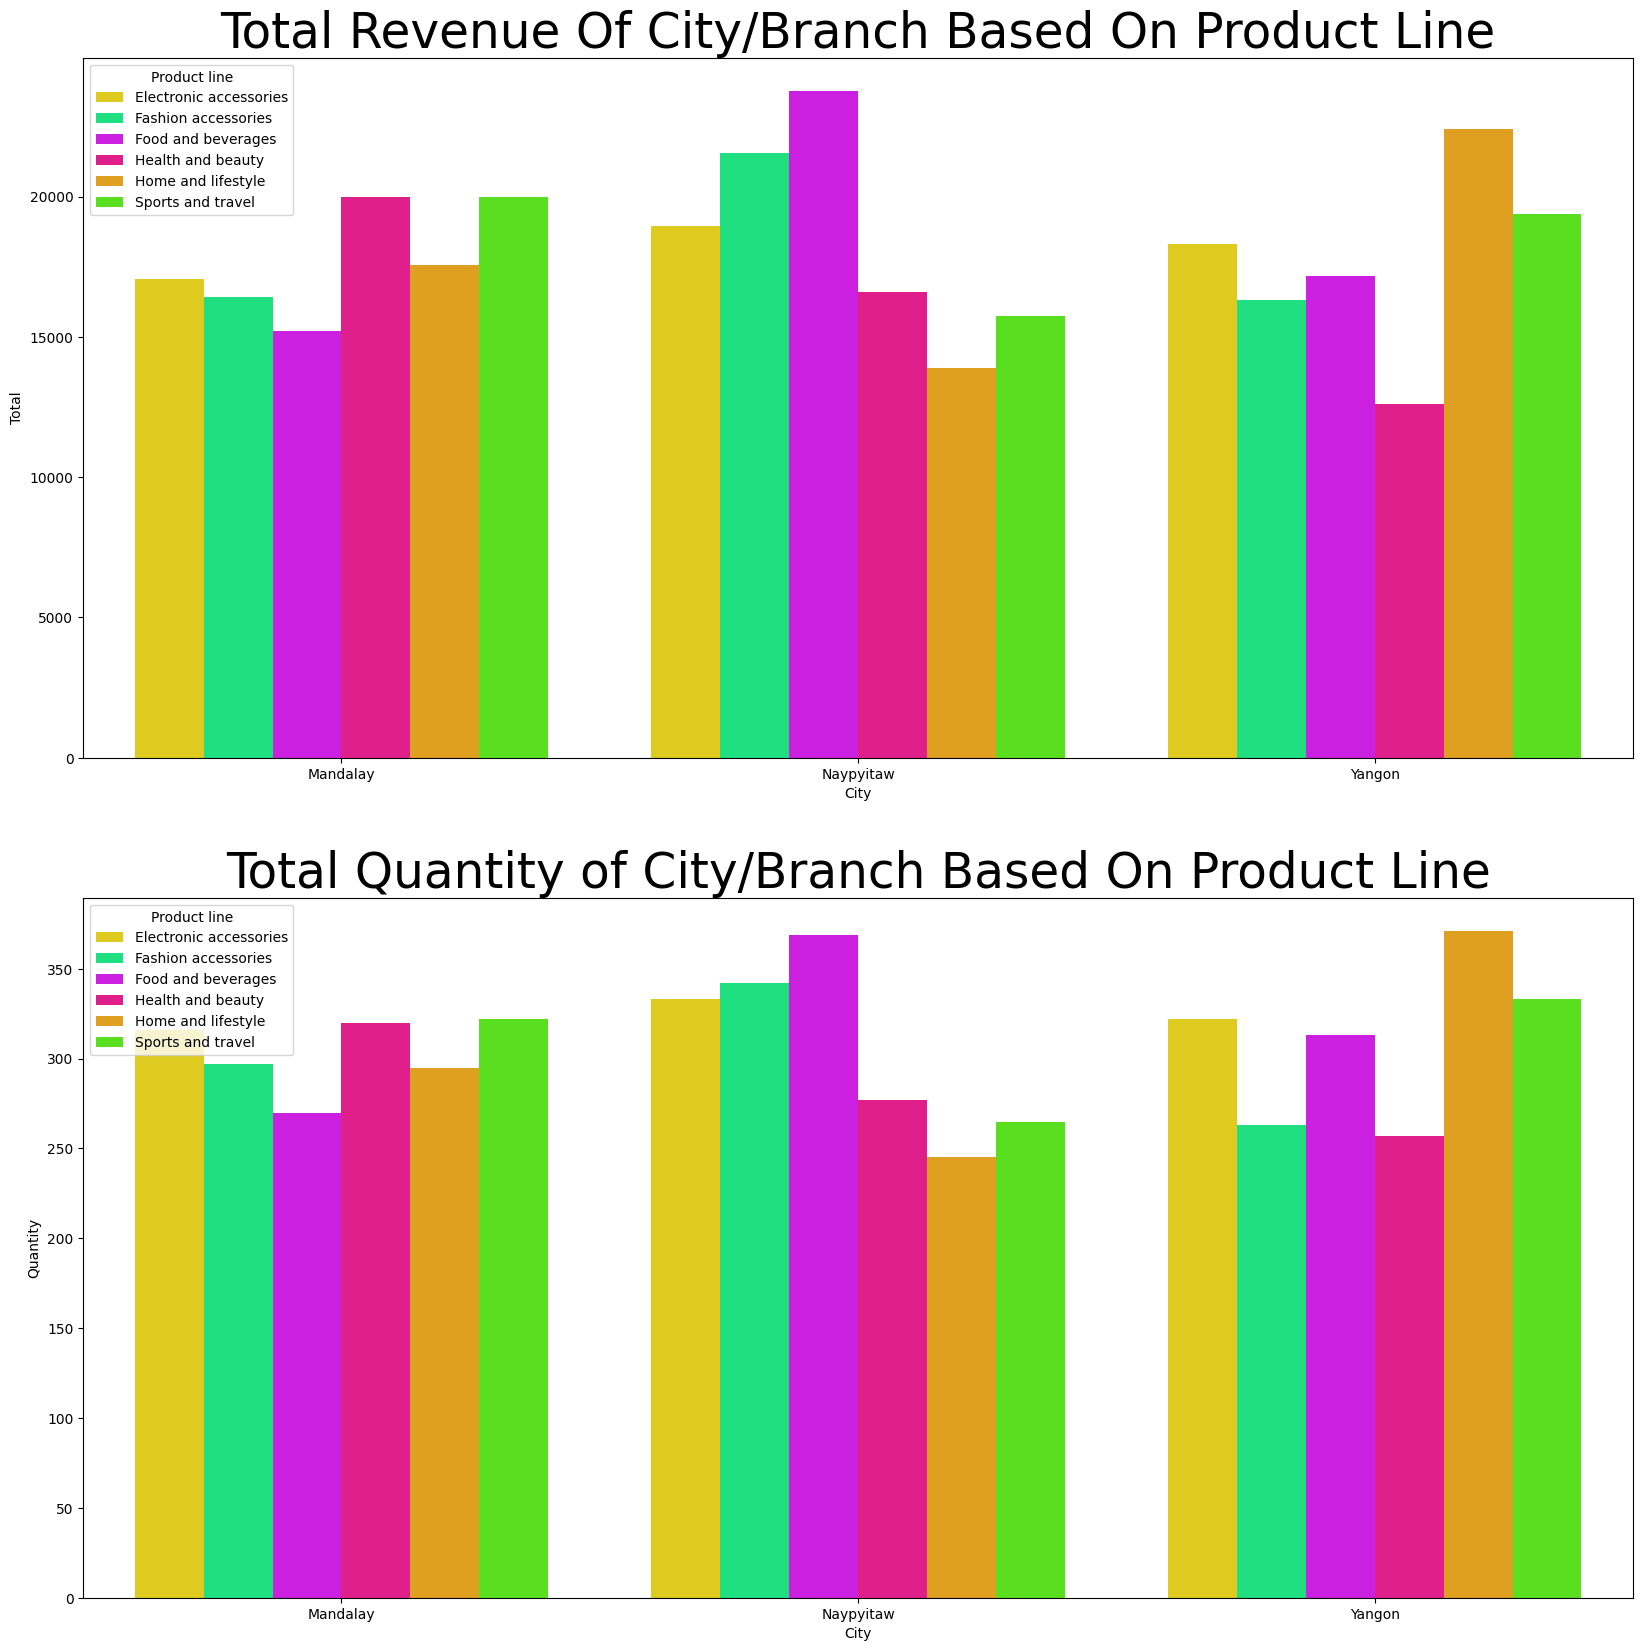

<Figure size 2000x1000 with 0 Axes>

In [1653]:
colors=['#FFE400','#00FF80','#E400FF','#FF008F','#FFAA00','#4DFF00']
fig, ax = plt.subplots(nrows = 2, ncols = 1,figsize=(20,20))
plt.figure(figsize=(20,10))
sns.barplot(x='City',y='Total',data=product_branch,hue='Product line',palette=colors,ax=ax[0])
ax[0].set_title('Total Revenue Of City/Branch Based On Product Line',fontsize=35)
sns.barplot(x='City',y='Quantity',data=product_branch,hue='Product line',palette=colors,ax=ax[1])
ax[1].set_title('Total Quantity of City/Branch Based On Product Line',fontsize=35)
plt.show()

## Based on gross income

In [1654]:
branch_gross_income = df.groupby('City',as_index=False).agg({
    'gross income' : 'sum'
}).sort_values(by='gross income',ascending=False)
branch_gross_income

,City,gross income
1,Naypyitaw,5265.1765
2,Yangon,5057.1605
0,Mandalay,5057.0320


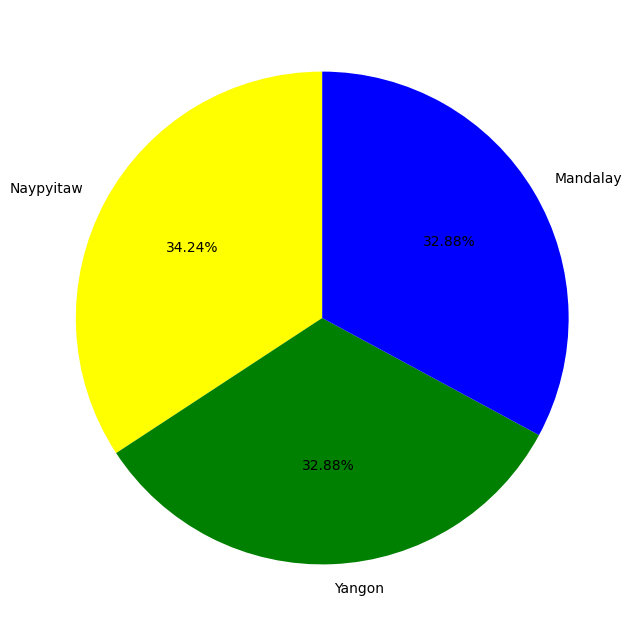

In [1655]:
plt.figure(figsize=(10,8))
plt.pie(branch_gross_income['gross income'],labels=branch_gross_income['City'],
       startangle=90,autopct='%1.2f%%',
       colors=['yellow','green','blue'])
plt.show()

## Based on payment count

In [1656]:
df['Payment'].value_counts().reset_index()

,Payment,count
0,Ewallet,345
1,Cash,344
2,Credit card,311


In [1657]:
payment_count = pd.pivot_table(df,
              index='Payment',
              columns='City',
              values='Invoice ID',
              aggfunc='nunique')
payment_count

City,Mandalay,Naypyitaw,Yangon
Payment,,,
Cash,110,124,110
Credit card,109,98,104
Ewallet,113,106,126


In [1658]:
payment_total = pd.pivot_table(df,
              index='Payment',
              columns='City',
              values='Total',
              aggfunc='sum')
payment_total

City,Mandalay,Naypyitaw,Yangon
Payment,,,
Cash,35339.4615,43085.8575,33781.2510
Credit card,37344.8565,30327.4650,33094.7505
Ewallet,33513.3540,37155.3840,39324.3690


In [1659]:
by_payment = df.groupby(by=['Payment','City'],as_index=False).agg({
    'Total' : 'sum' ,
    'Invoice ID' : 'nunique'
})

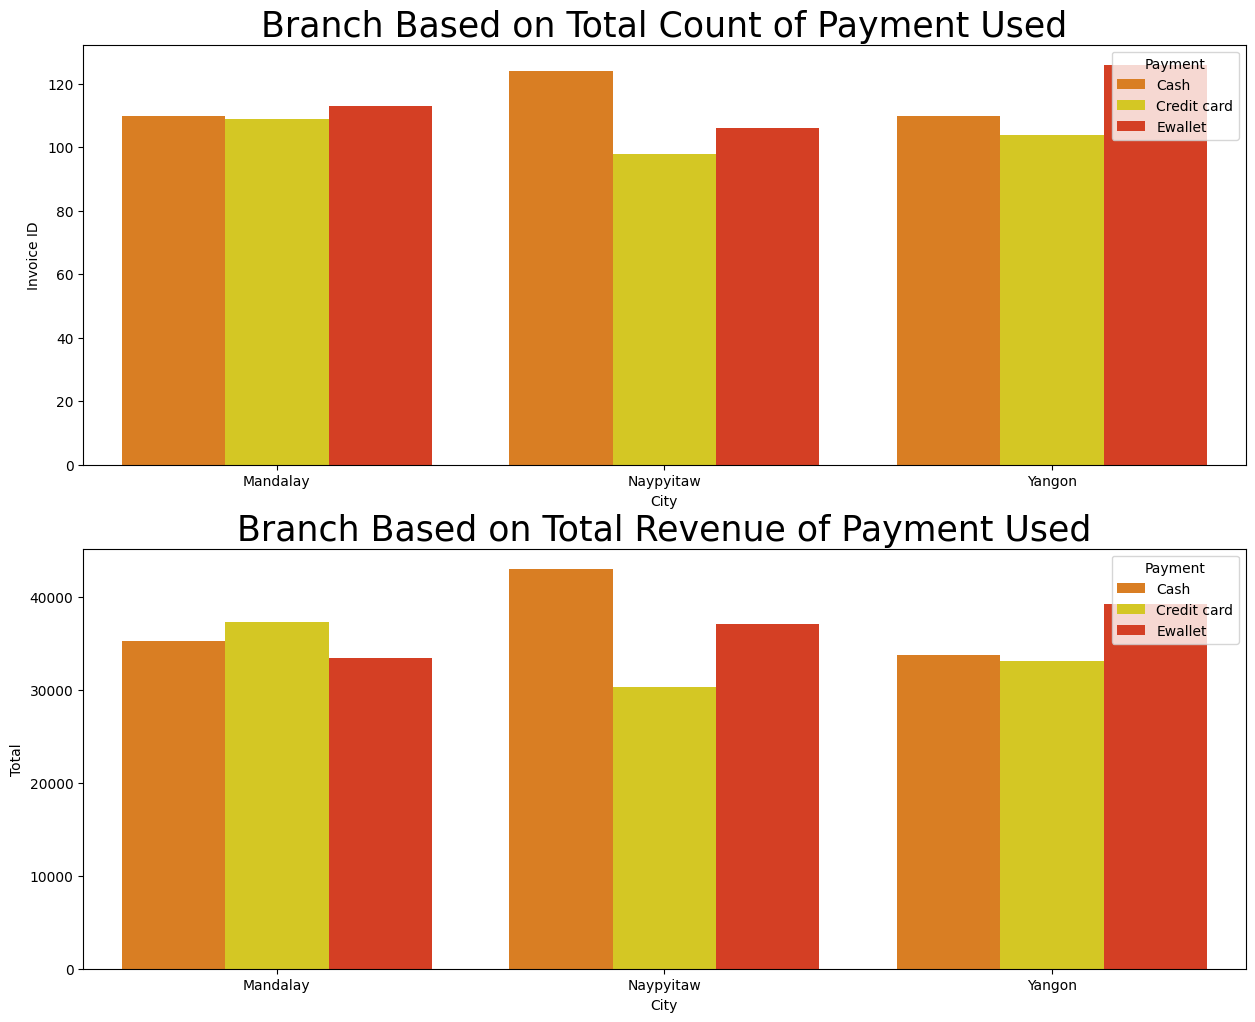

In [1660]:
colors=['#F77E05','#F2E006','#F22A06']
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,12))
sns.barplot(x='City',y='Invoice ID',data=by_payment,hue='Payment',palette=colors,ax=ax[0])
ax[0].set_title('Branch Based on Total Count of Payment Used',fontsize=25)
sns.barplot(x='City',y='Total',data=by_payment,hue='Payment',palette=colors,ax=ax[1])
ax[1].set_title('Branch Based on Total Revenue of Payment Used',fontsize=25)
plt.show()

# GENDER

In [1661]:
gender = df.groupby('Gender').agg({
    'Invoice ID' : 'nunique'
}).reset_index()
gender.rename(columns={
    'Invoice ID' : 'count'
},inplace=True)

   Gender  count
0  Female    501
1    Male    499


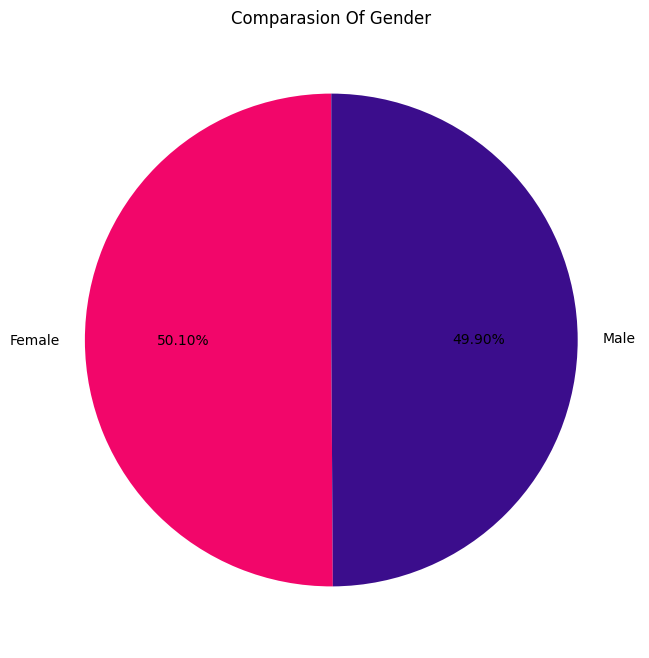

In [1662]:
plt.figure(figsize=(10,8))
plt.pie(gender['count'],labels=gender['Gender'],
       startangle=90,autopct='%1.2f%%',
       colors=['#F2066A','#3B0D8C'])
plt.title('Comparasion Of Gender')
print(gender)
plt.show()

## Based on city

In [1663]:
gender_city = pd.pivot_table(df,
                            index='City',
                            columns='Gender',
                            values='Invoice ID',
                            aggfunc='nunique').reset_index()
gender_city

Gender,City,Female,Male
0,Mandalay,162,170
1,Naypyitaw,178,150
2,Yangon,161,179


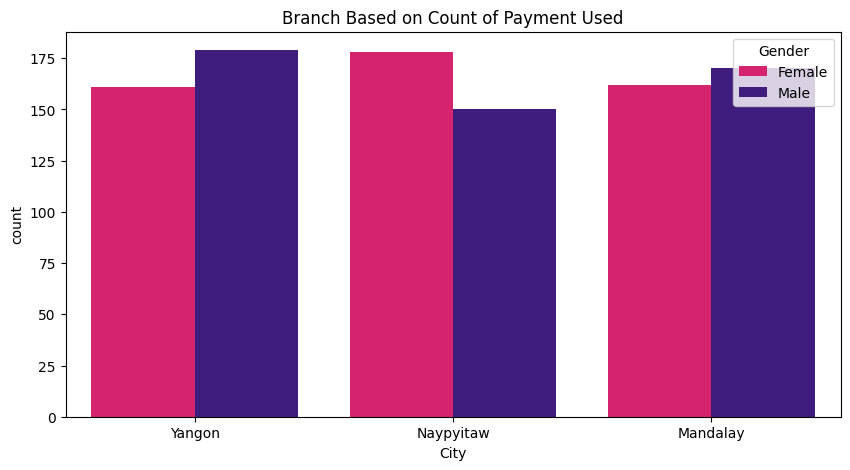

In [1664]:
colors=['#F2066A','#3B0D8C']
plt.figure(figsize=(10,5))
sns.countplot(x='City',data=df,hue='Gender',palette=colors)
plt.title('Branch Based on Count of Payment Used')
plt.show()

## Based on Count Of Product line

In [1665]:
gender_product = pd.pivot_table(df,
                            index='Product line',
                            columns='Gender',
                            values='Invoice ID',
                            aggfunc='nunique').reset_index()
gender_product

Gender,Product line,Female,Male
0,Electronic accessories,84,86
1,Fashion accessories,96,82
2,Food and beverages,90,84
3,Health and beauty,64,88
4,Home and lifestyle,79,81
5,Sports and travel,88,78


## Based on Revenue Of Product line

In [1666]:
gender_product = pd.pivot_table(df,
                            index='Product line',
                            columns='Gender',
                            values='Total',
                            aggfunc='sum').reset_index()
gender_product

Gender,Product line,Female,Male
0,Electronic accessories,27102.0225,27235.5090
1,Fashion accessories,30437.4000,23868.4950
2,Food and beverages,33170.9175,22973.9265
3,Health and beauty,18560.9865,30632.7525
4,Home and lifestyle,30036.8775,23825.0355
5,Sports and travel,28574.7210,26548.1055


In [1667]:
gender_product = pd.pivot_table(df,
                            index=['Gender','Product line'],
                            values='Total',
                            aggfunc='sum').reset_index()

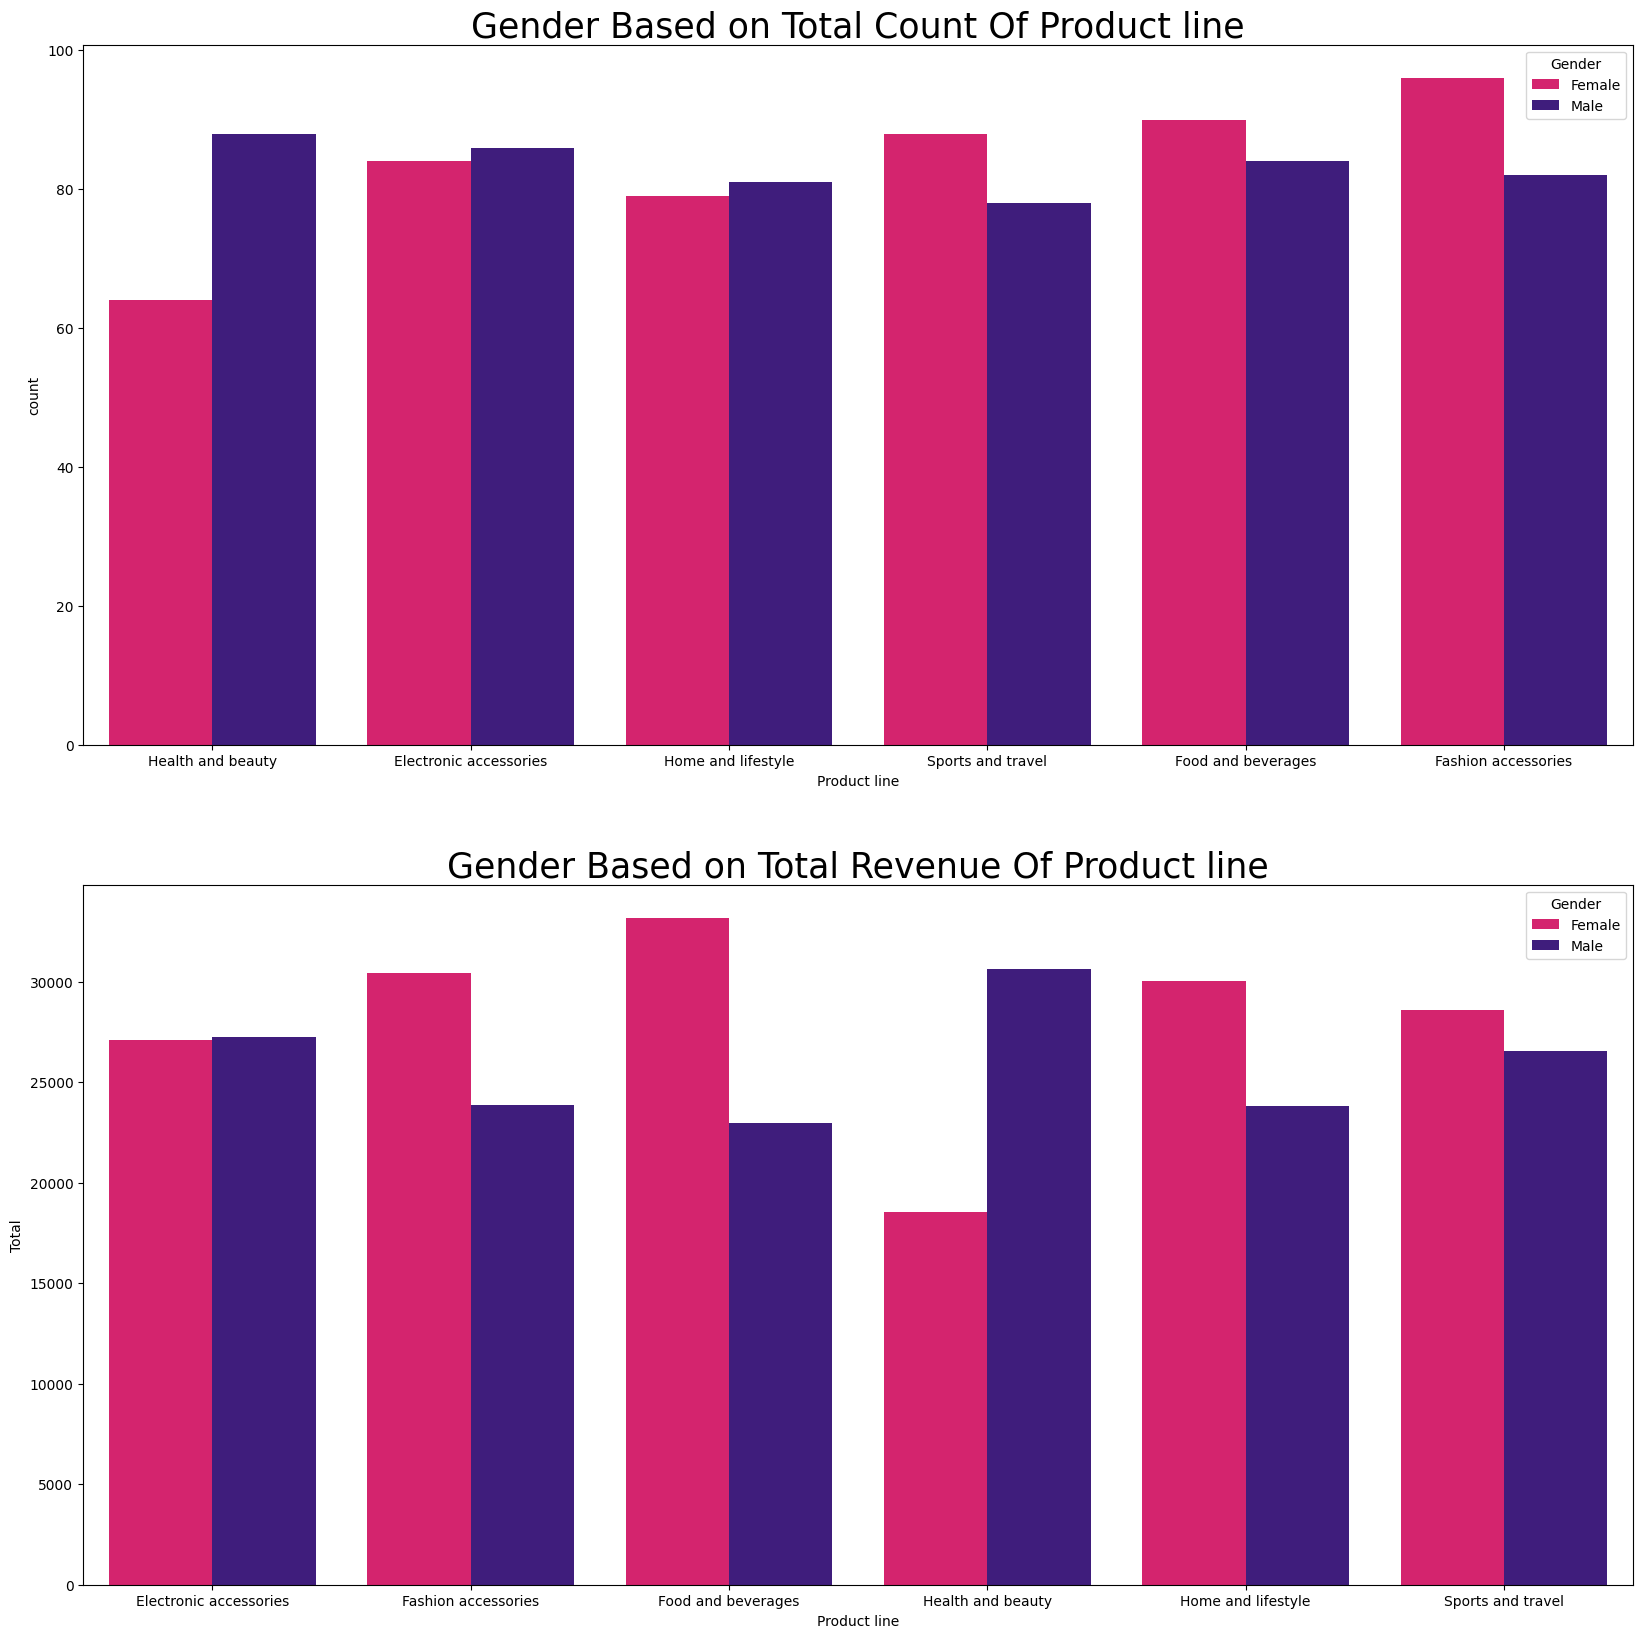

In [1668]:
colors=['#F2066A','#3B0D8C']
fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize=(20,20))
sns.countplot(x='Product line',data=df,hue='Gender',palette=colors,ax=ax[0])
ax[0].set_title('Gender Based on Total Count Of Product line',fontsize=25)
sns.barplot(x='Product line',y='Total',data=gender_product,hue='Gender',palette=colors,ax=ax[1])
ax[1].set_title('Gender Based on Total Revenue Of Product line',fontsize=25)
plt.show()

# CUSTOMER TYPE

In [1669]:
type = df.groupby('Customer type').agg({
    'Invoice ID' : 'nunique'
}).reset_index()
type.rename(columns={
    'Invoice ID' : 'count'
},inplace=True)

  Customer type  count
0        Member    501
1        Normal    499


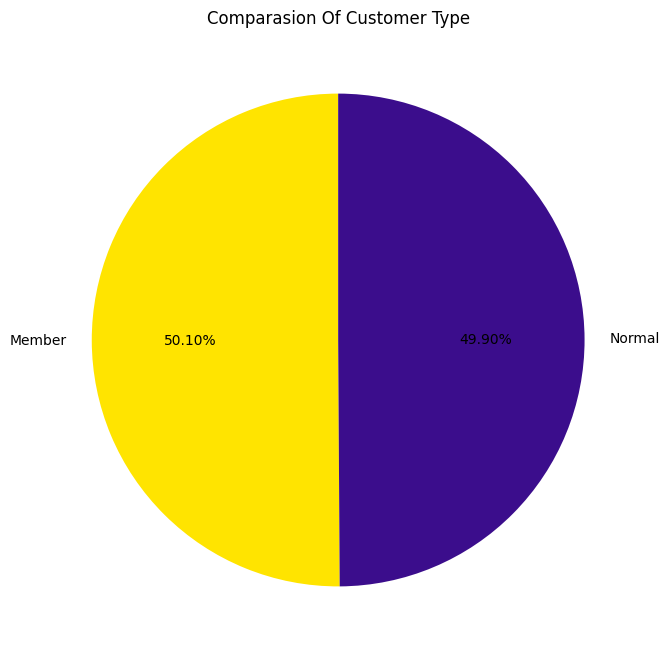

In [1670]:
plt.figure(figsize=(10,8))
plt.pie(type['count'],labels=type['Customer type'],
       startangle=90,autopct='%1.2f%%',
       colors=['#FFE400','#3B0D8C'])
plt.title('Comparasion Of Customer Type')
print(type)
plt.show()

## Based On Revenue

In [1671]:
total_type = df.groupby(by='Customer type',as_index=False).agg({
    'Total' : 'sum'
}).sort_values(by='Total',ascending=False)
total_type

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


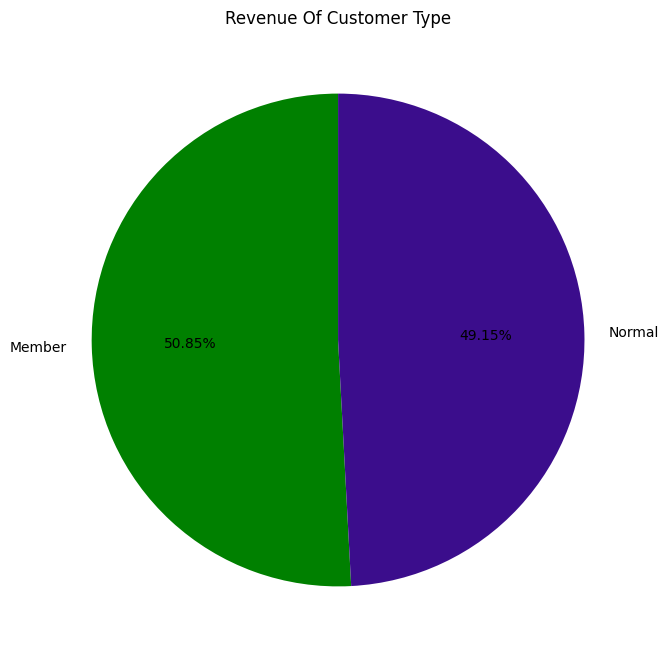

In [1672]:
plt.figure(figsize=(10,8))
plt.pie(total_type['Total'],labels=total_type['Customer type'],
       startangle=90,autopct='%1.2f%%',
       colors=['green','#3B0D8C'])
plt.title('Revenue Of Customer Type')
plt.show()

## Based On City/Branch

In [1673]:
type_city = pd.pivot_table(df,
                          index = 'Customer type',
                          columns = 'City',
                          values = 'Invoice ID',
                          aggfunc = 'nunique')
type_total = type_city = pd.pivot_table(df,
                          index = 'Customer type',
                          columns = 'City',
                          values = 'Total',
                          aggfunc = 'sum')

## Total Count of customer type based on Branch/city

In [1674]:
type_city

City,Mandalay,Naypyitaw,Yangon
Customer type,,,
Member,53704.686,56881.2825,53637.4755
Normal,52492.986,53687.4240,52562.8950


## Total Revenue of customer type based on Branch/city

In [1675]:
type_total

City,Mandalay,Naypyitaw,Yangon
Customer type,,,
Member,53704.686,56881.2825,53637.4755
Normal,52492.986,53687.4240,52562.8950


In [1676]:
cust_type = df.groupby(by=['Customer type','City'],as_index=False).agg({
    'Invoice ID' : 'nunique',
    'Total' : 'sum' 
})

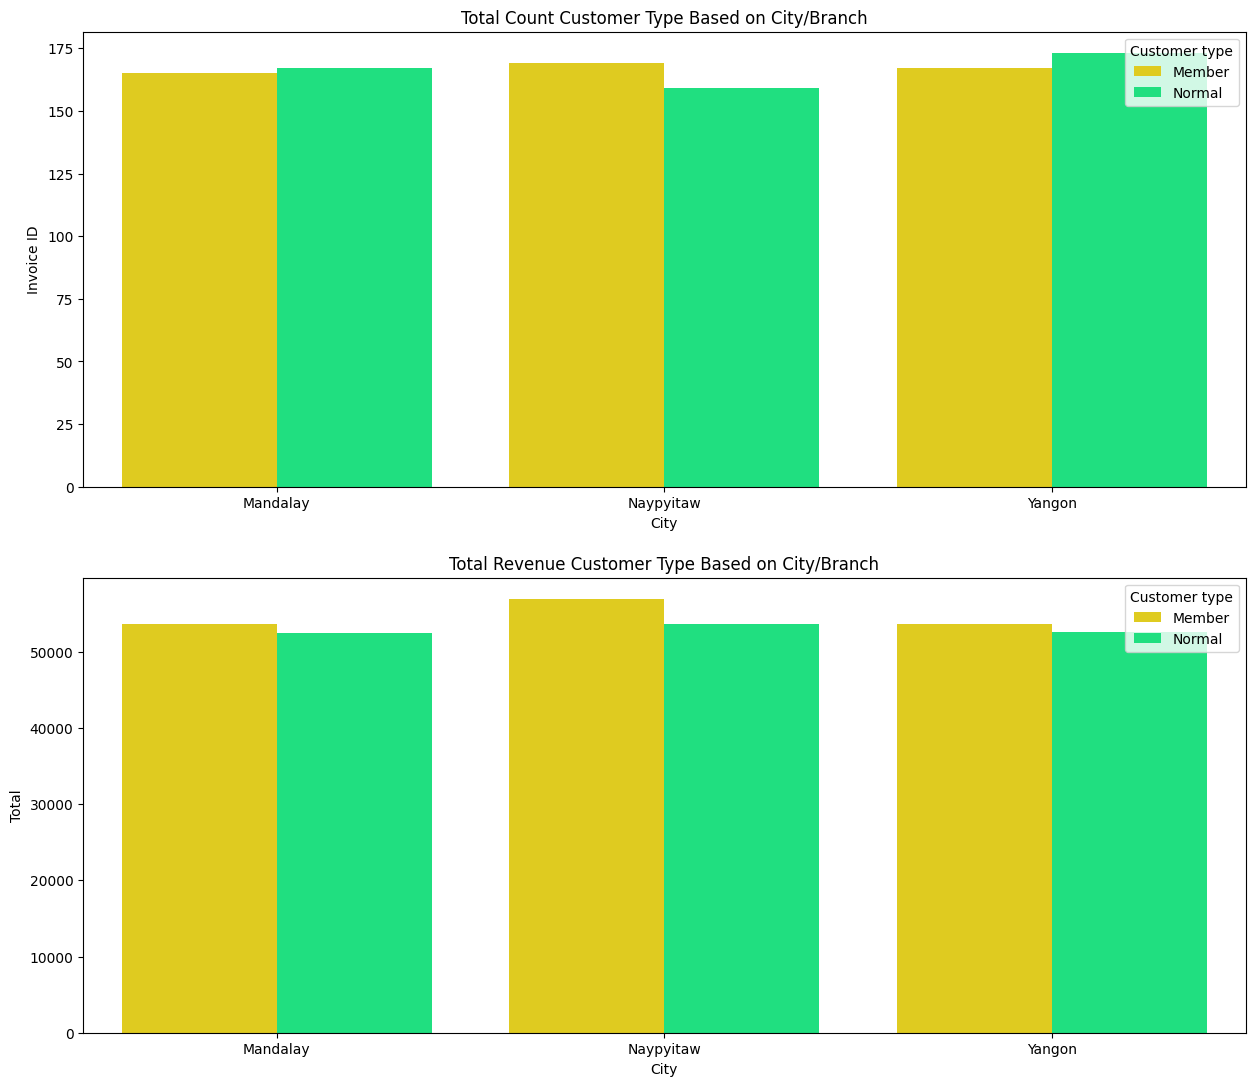

In [1677]:
colors = ['#FFE400','#00FF80','#FFAA00']
fig, ax = plt.subplots(nrows =2, ncols = 1, figsize=(15,13))
sns.barplot(x='City',y='Invoice ID',data=cust_type,hue='Customer type',palette=colors,ax=ax[0])
ax[0].set_title('Total Count Customer Type Based on City/Branch')
sns.barplot(x='City',y='Total',data=cust_type,hue='Customer type',palette=colors,ax=ax[1])
ax[1].set_title('Total Revenue Customer Type Based on City/Branch')
plt.show()

## Based On Gender

In [1678]:
pd.pivot_table(df,
              index='Customer type',
               columns='Gender',
              values='Invoice ID',
              aggfunc='nunique')

Gender,Female,Male
Customer type,,
Member,261,240
Normal,240,259


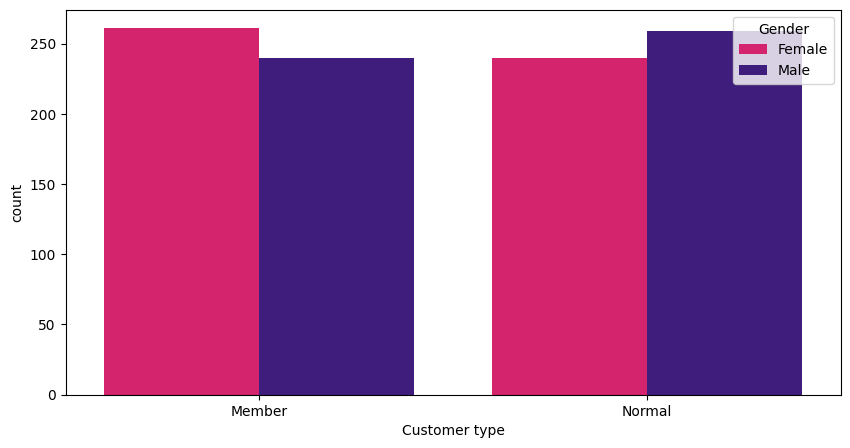

In [1679]:
colors=['#F2066A','#3B0D8C']
plt.figure(figsize=(10,5))
sns.countplot(x='Customer type',data=df,hue='Gender',palette=colors)
plt.show()

In [1680]:
type_product = pd.pivot_table(df,
                            index=['Customer type','Product line'],
                            values='Total',
                            aggfunc='sum').reset_index().reset_index()

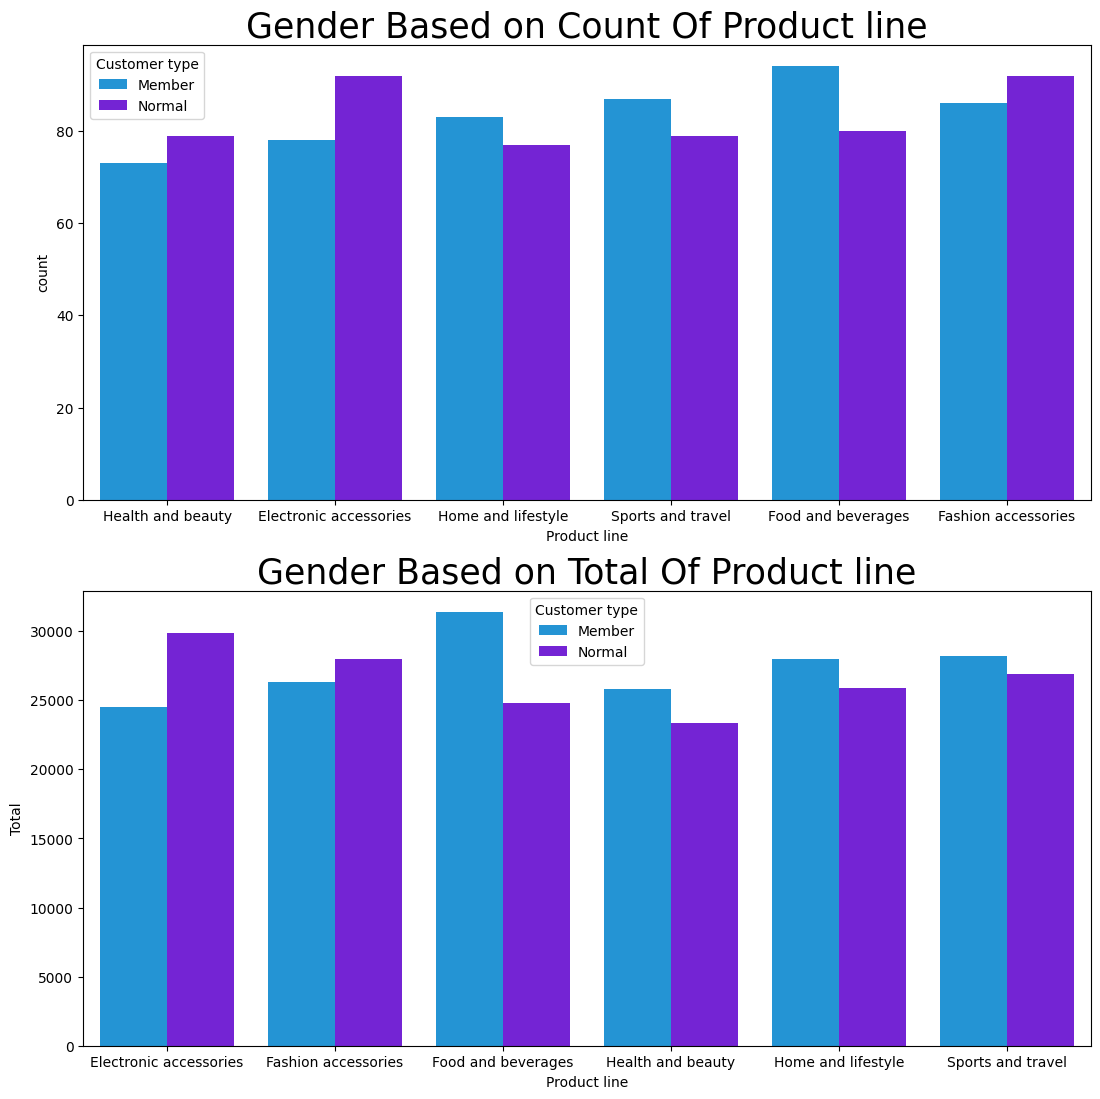

In [1681]:
colors=['#069CF2','#7106F2','#E400FF','#FF008F','#FFAA00','#4DFF00']
fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize=(13,13))
sns.countplot(x='Product line',data=df,hue='Customer type',palette=colors,ax=ax[0])
ax[0].set_title('Gender Based on Count Of Product line',fontsize=25)
sns.barplot(x='Product line',y='Total',data=type_product,hue='Customer type',palette=colors,ax=ax[1])
ax[1].set_title('Gender Based on Total Of Product line',fontsize=25)
plt.show()

# Tren

In [1682]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
growth = df.resample(rule='D',on='Date').agg({
    'Quantity' : 'sum',
    'Total' : 'sum',
    'Invoice ID' : 'nunique'
}).reset_index()
growth.rename(columns={
    'Total' : 'Revenue',
    'Invoice ID' : 'Order Count'
},inplace=True)
growth['Day'] = (growth['Date'] - growth['Date'].min()).dt.days
growth['Quarter'] = growth['Date'].dt.strftime('%d')
growth['Month'] = growth['Date'].dt.strftime('%m')
growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         89 non-null     datetime64[ns]
 1   Quantity     89 non-null     int64         
 2   Revenue      89 non-null     float64       
 3   Order Count  89 non-null     int64         
 4   Day          89 non-null     int64         
 5   Quarter      89 non-null     object        
 6   Month        89 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.0+ KB


In [1683]:
growth['Revenue'] = growth['Revenue'].astype('int64')
growth.describe(include='all')

,Date,Quantity,Revenue,Order Count,Day,Quarter,Month
count,89,89.000000,89.000000,89.000000,89.000000,89,89
unique,NaN,NaN,NaN,NaN,NaN,31,3
top,NaN,NaN,NaN,NaN,NaN,01,01
freq,NaN,NaN,NaN,NaN,NaN,3,31
mean,2019-02-14 00:00:00,61.910112,3628.393258,11.235955,44.000000,NaN,NaN
min,2019-01-01 00:00:00,18.000000,934.000000,6.000000,0.000000,NaN,NaN
25%,2019-01-23 00:00:00,47.000000,2444.000000,9.000000,22.000000,NaN,NaN
50%,2019-02-14 00:00:00,59.000000,3163.000000,11.000000,44.000000,NaN,NaN
75%,2019-03-08 00:00:00,80.000000,4745.000000,13.000000,66.000000,NaN,NaN
max,2019-03-30 00:00:00,128.000000,7474.000000,20.000000,88.000000,NaN,NaN


In [1684]:
growth[growth.Revenue == growth.Revenue.max()]

,Date,Quantity,Revenue,Order Count,Day,Quarter,Month
67,2019-03-09,99,7474,16,67,09,03


In [1685]:
growth[growth.Revenue == growth.Revenue.min()]

,Date,Quantity,Revenue,Order Count,Day,Quarter,Month
43,2019-02-13,31,934,8,43,13,02


In [1686]:
growth.groupby('Month').Revenue.sum().reset_index()

,Month,Revenue
0,01,116277
1,02,97207
2,03,109443


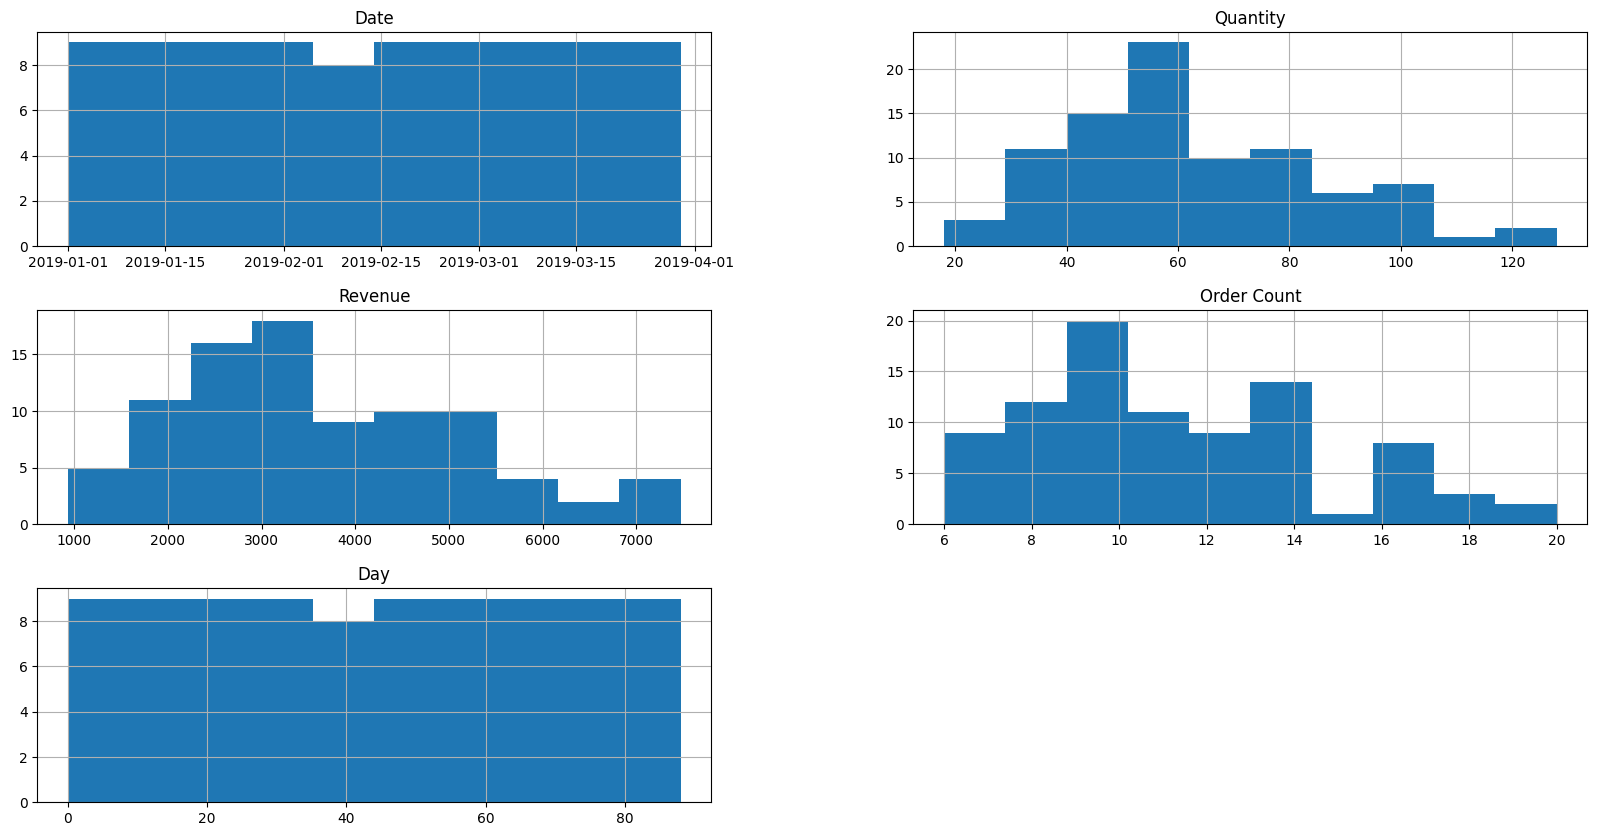

In [1687]:
growth.hist(figsize=(20,10))
plt.show()

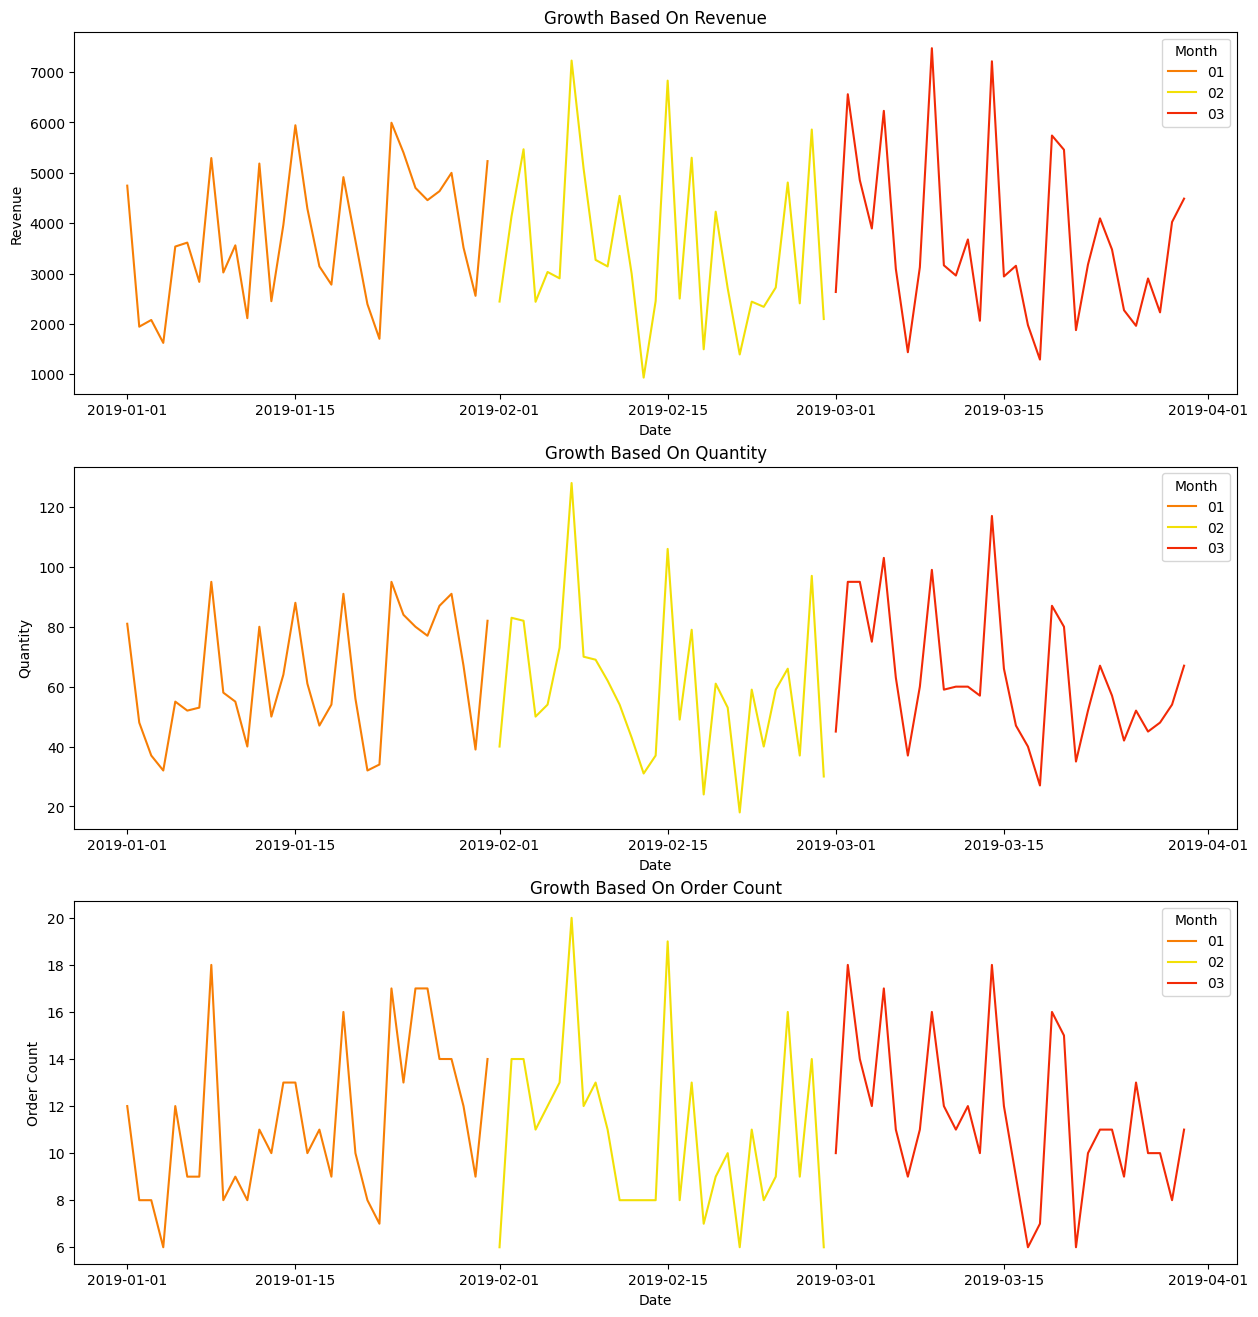

In [1688]:
colors=['#F77E05','#F2E006','#F22A06']
fig, ax = plt.subplots(nrows=3, ncols= 1, figsize=(15,16))
sns.lineplot(x='Date',y='Revenue',data=growth,hue='Month',palette=colors,ax=ax[0])
ax[0].set_title('Growth Based On Revenue')
sns.lineplot(x='Date',y='Quantity',data=growth,hue='Month',palette=colors,ax=ax[1])
ax[1].set_title('Growth Based On Quantity')
sns.lineplot(x='Date',y='Order Count',data=growth,hue='Month',palette=colors,ax=ax[2])
ax[2].set_title('Growth Based On Order Count')
plt.show()

In [1689]:
Quarter = growth.groupby('Quarter',as_index=False).agg({
    'Revenue' : 'sum',
    'Order Count' : 'sum',
})
Quarter.rename(columns={
    'Order Count' : 'order_count'
},inplace=True)
Quarter

,Quarter,Revenue,order_count
0,01,9823,28
1,02,12645,40
2,03,12398,36
3,04,7956,29
4,05,12797,41
5,06,9611,33
6,07,11500,38
7,08,13502,41
8,09,13766,37
9,10,9864,32


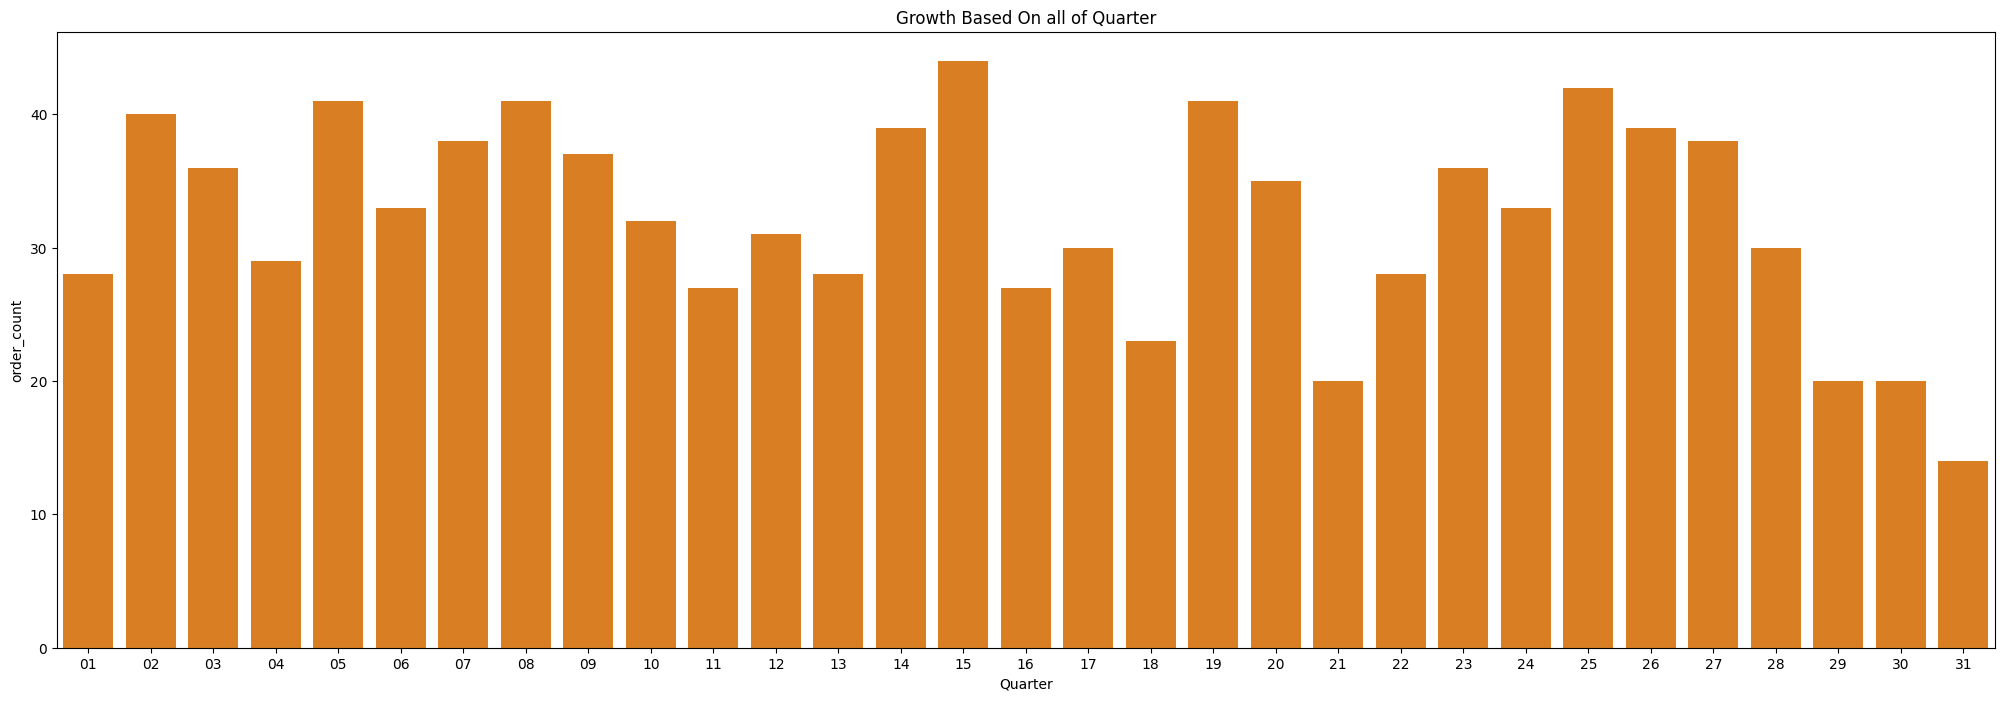

In [1690]:
colors=['#F77E05']
plt.figure(figsize=(25,8))
sns.barplot(x='Quarter',y='order_count',data=Quarter,palette=colors)
plt.title('Growth Based On all of Quarter')
plt.show()

In [1691]:
fifth = df.loc[((df['Date']=='15/1/2019') | (df['Date']=='15/2/2019') | (df['Date']=='15/3/2019'))]
by_product_fifthteen = fifth['Product line'].value_counts().reset_index()

             Product line  count
0       Health and beauty     11
1      Home and lifestyle      8
2  Electronic accessories      7
3     Fashion accessories      7
4       Sports and travel      6
5      Food and beverages      5


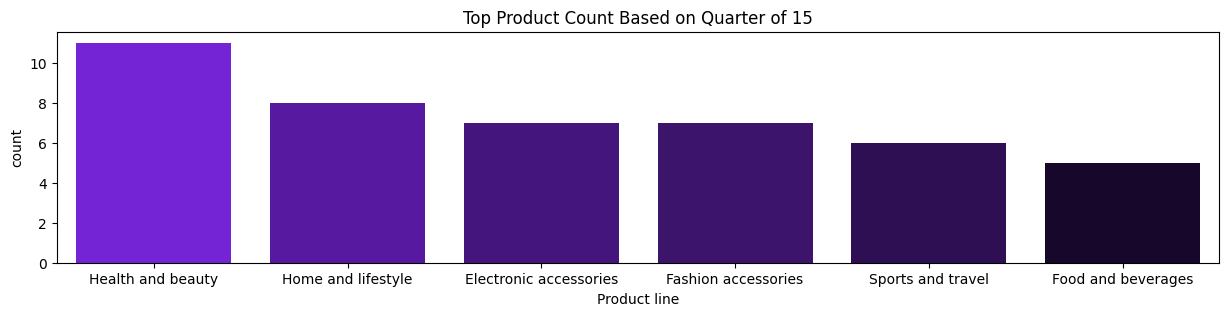

In [1692]:
plt.figure(figsize=(15,3))
colors=['#7106F2','#5403B5','#43048F','#3B057B','#2E045F','#170131']
sns.barplot(x='Product line',y='count',data=by_product_fifthteen,palette=colors)
plt.title('Top Product Count Based on Quarter of 15')
print(by_product_fifthteen)
plt.show()

In [1693]:
growth.loc[(growth['Quarter']=='31')]

,Date,Quantity,Revenue,Order Count,Day,Quarter,Month
30,2019-01-31,82,5232,14,30,31,01


## Based On DAY

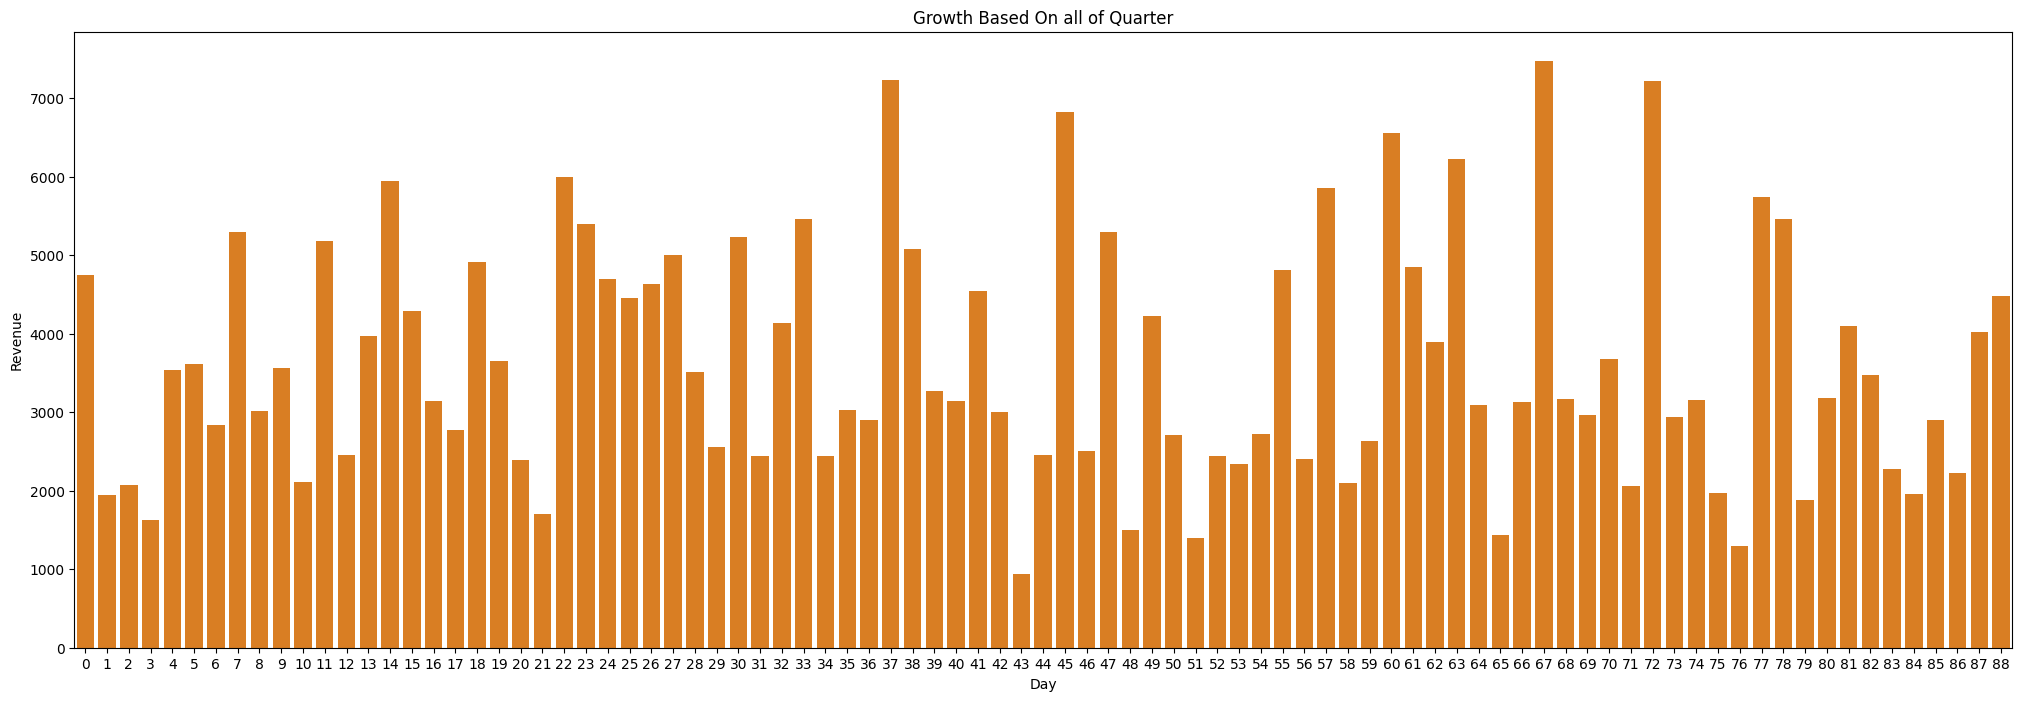

In [1694]:
colors=['#F77E05']
plt.figure(figsize=(25,8))
sns.barplot(x='Day',y='Revenue',data=growth.sort_values(by='Day',ascending=False),palette=colors)
plt.title('Growth Based On all of Quarter')
plt.show()

In [1695]:
growth.loc[(growth['Day']==67)]

,Date,Quantity,Revenue,Order Count,Day,Quarter,Month
67,2019-03-09,99,7474,16,67,09,03


In [1696]:
by_67 = df.loc[(df['Date']=='2019-03-09')]
byproduct_67 = by_67.groupby('Product line',as_index=False).agg({
    'Total' : 'sum',
    'Invoice ID' : 'nunique'
})
byproduct_67

,Product line,Total,Invoice ID
0,Electronic accessories,980.0070,3
1,Fashion accessories,2010.8970,4
2,Food and beverages,1459.1115,2
3,Health and beauty,762.5520,2
4,Home and lifestyle,383.5230,1
5,Sports and travel,1877.9565,4


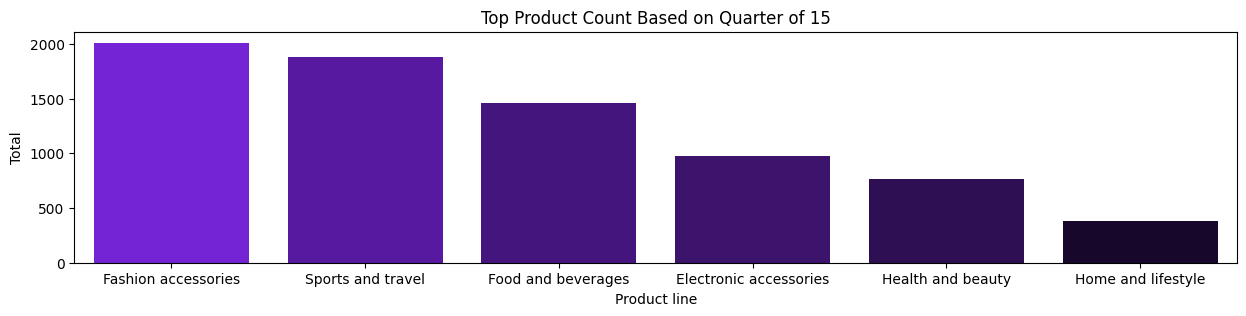

In [1697]:
plt.figure(figsize=(15,3))
colors=['#7106F2','#5403B5','#43048F','#3B057B','#2E045F','#170131']
sns.barplot(x='Product line',y='Total',data=byproduct_67.sort_values(by='Total',ascending=False),palette=colors)
plt.title('Top Product Count Based on Quarter of 15')
plt.show()

# Linear Regression

In [1698]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x = growth[['Day']]
y = growth['Revenue']

In [1699]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

0.0


Text(0.5, 1.0, 'Plot Horsepower vs Price')

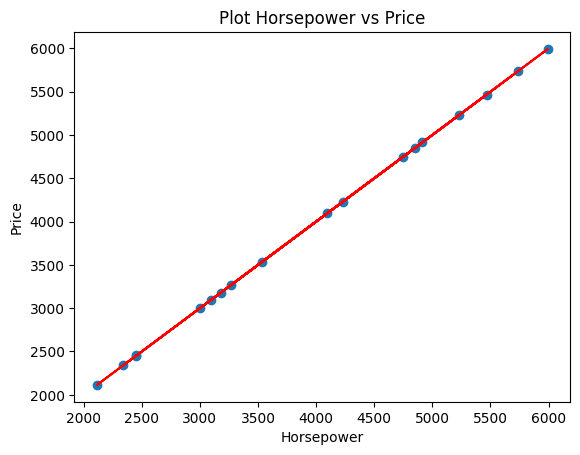

In [1700]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

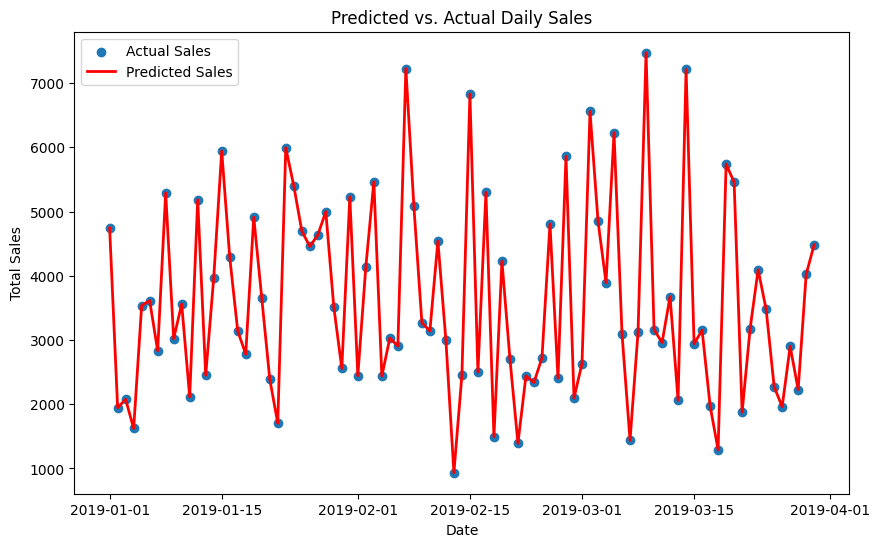

In [1701]:
plt.figure(figsize=(10, 6))
plt.scatter(growth['Date'], growth['Revenue'], label='Actual Sales')
plt.plot(growth['Date'], model.predict(growth[['Revenue']]), color='red', label='Predicted Sales', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Predicted vs. Actual Daily Sales')
plt.legend()
plt.show()

# Conclusion

1. **Price, Location and Size Variables**
   You do an analysis of these three variables: price, location, and size. These variables are considered to have an influence on your product sales.

2. **Table of Correlation and Scatter Plot**
   You use correlation tables and scatter plots to show the relationships between the variables. Scatter plots help you visualize the spread of your data and see if there are any visible trends or patterns.

3. **Simple Linear Regression Analysis**
   You perform a simple linear regression analysis for each variable on sales. This helps you understand how much influence each individual variable has on sales.

4. **Coefficient of Determination (R-squared)**
   You use the concept of the coefficient of determination to describe how well the variability of sales can be explained by the variability of price, location, or size. The higher the R-squared value, the better the model can explain the variation in the data.

5. **Conclusion of the Analysis**
   In your conclusion, you state that price has a significant effect on sales, followed by location and size. However, it is important to note that these results may only be correlation and not causality.

6. **Recommendation for Decision Making**
   You provide recommendations for strategies based on your analysis. For example, re-evaluating pricing schemes for products in certain locations or assessing the effect of size on customer preferences.

7. **Limitation of Analysis**
   You acknowledge limitations to your analysis, such as the limited amount of data, the assumptions used in linear regression, and other factors that may not have been included in the model.